In [26]:
import numpy as np
import matplotlib.pylab as plt


# Perceptron

In [12]:
def AND(x):
    w = np.array([.5, .5])
    b = -.7
    
    z = w @ x + b

    if z >= 0:
        return 1
    else:
        return 0
    

In [13]:
for x in np.array([ [0, 0], [1, 0], [0, 1], [1, 1]]):
    print(AND(x))

0
0
0
1


In [14]:
def NAND(x):
    w = np.array([-.5, -.5])
    b = .7
    
    z = w @ x + b

    if z >= 0:
        return 1
    else:
        return 0
    

In [16]:
for x in np.array([ [0, 0], [1, 0], [0, 1], [1, 1]]):
    print(NAND(x))

1
1
1
0


In [21]:
def OR(x):
    w = np.array([.5, .5])
    b = -.2
    
    z = w @ x + b

    if z >= 0:
        return 1
    else:
        return 0

In [22]:
for x in np.array([ [0, 0], [1, 0], [0, 1], [1, 1]]):
    print(OR(x))

0
1
1
1


In [23]:
def XOR(x):
    """
    a simple 2-layer perceptron
    XOR = NAND & OR
    """
    a = NAND(x)
    b = OR(x)
    return AND([a , b])
    

In [24]:
for x in np.array([ [0, 0], [1, 0], [0, 1], [1, 1]]):
    print(XOR(x))


0
1
1
0


# Activation function

In [40]:
def step_function(x):
    return (-1)**(x<0)


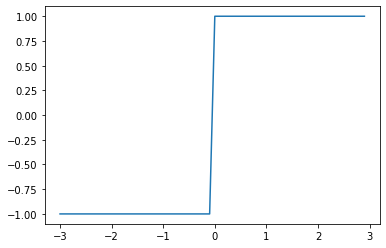

In [41]:
x = np.arange(-3, 3, 0.1)
y = step_function(x)

plt.plot(x, y)

In [43]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


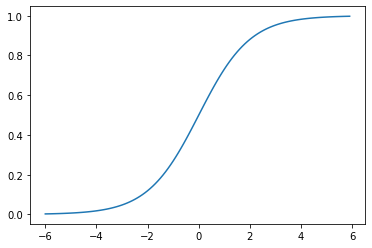

In [45]:
x = np.arange(-6, 6, 0.1)
y = sigmoid(x)

plt.plot(x, y)

In [53]:
def relu(x):
    return np.maximum(0, x)


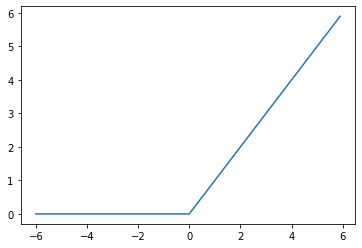

In [54]:
x = np.arange(-6, 6, 0.1)
y = relu(x)

plt.plot(x, y)

In [59]:
def identify_function(x):
    return x

# A Simple MLP

In [57]:
# the first layer
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

a1 = X@W1 +B1
z1 = sigmoid(a1)

print(a1, z1)


[0.3 0.7 1.1] [0.57444252 0.66818777 0.75026011]


In [58]:
# the second layer
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

a2 = z1@W2 +B2
z2 = sigmoid(a2)
print(a2, z2)


[0.51615984 1.21402696] [0.62624937 0.7710107 ]


In [60]:
# the third hidden layer
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

a3 = np.dot(z2, W3) + B3
z3 = identify_function(a3)

print(a3, z3)


[0.31682708 0.69627909] [0.31682708 0.69627909]


In [62]:
def init_network():
    network = {}
    
    network['w1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['w2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['w3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    w1, w2, w3 = network['w1'], network['w2'], network['w3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = x @ w1 + b1
    z1 = sigmoid(a1)
    
    a2 = z1 @ w2 + b2
    z2 = sigmoid(a2)
    
    a3 = z2 @ w3 + b3
    z3 = identify_function(a3)
    
    return z3

net = init_network()
x = np.array([1, 0.5])
forward(net,x)


array([0.31682708, 0.69627909])

# Softmax

In [74]:
def softmax(a):
    exp_a = np.exp(a)
    return exp_a / np.sum(exp_a)


In [75]:
x = [1020, 1000]

# overflow
print(softmax(x))

# log-sum-exp trick
max_val = np.max(x)
softmax(x - max_val)


[nan nan]


<ipython-input-74-abb76d7ba679>:2: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
<ipython-input-74-abb76d7ba679>:3: RuntimeWarning: invalid value encountered in true_divide
  return exp_a / np.sum(exp_a)


array([9.99999998e-01, 2.06115362e-09])

In [76]:
def softmax(a):
    max_val = np.max(a)
    exp_a = np.exp(a - max_val)
    return exp_a / np.sum(exp_a)


# Loss Function

In [80]:
def mean_squared_error(t, p):
    return .5 * np.sum((t - p)**2)


In [82]:
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) # the correct class is 2
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

mean_squared_error(t, y)


0.09750000000000003

In [78]:
def cross_entropy_error(t, p):
    return -np.sum(t*np.log(p))


In [83]:

cross_entropy_error(t, y)


<ipython-input-78-c7ce149f03ec>:2: RuntimeWarning: divide by zero encountered in log
  return -np.sum(t*np.log(p))
<ipython-input-78-c7ce149f03ec>:2: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(t*np.log(p))


nan

In [84]:
def cross_entropy_error(t, p):
    delta = 1e-7
    return -np.sum(t*np.log(p + delta)) # shift


In [85]:
cross_entropy_error(t, y)


0.510825457099338

In [149]:
def cross_entropy_error(t, p):
    if p.ndim == 1: # for a single point
        p = p.reshape(1, p.size)
        t = t.reshape(1, t.size)
        
    delta = 1e-7
    batch_size = p.shape[0]

    return -np.sum(t * np.log(p + delta)) / batch_size


In [150]:
t1 = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) # the correct class is 2
y1 = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

cross_entropy_error(t1, y1)


0.510825457099338

In [148]:
def cross_entropy_error_2(t, p):    
    if p.ndim == 1: # for a single point
        p = p.reshape(1, p.size)
        t = t.reshape(1, t.size)
        
    delta = 1e-7
    batch_size = p.shape[0] # the counts of the observations

    # no need to care about 0, but the one hot encoding needs.
    return -np.sum(np.log(p[np.arange(batch_size), t] + delta)) / batch_size


In [109]:
t1 = np.array([2]) # the correct class is 2
y1 = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

cross_entropy_error_2(t1, y1)


0.510825457099338

# Numerical Differential

In [4]:
def squared(x):
    return x**2


def numerical_diff(f, x):
    h = 1e-4

    return (f(x + h) - f(x)) / h

numerical_diff(squared, 4)


8.00009999998963

In [115]:
# rounding error
np.float32(1e-50)

# so the value of h cannot be smaller than what we expect, otherwise it introduce rounding error



0.0

In [5]:
# a better way to calculate derivatives
def centered_numerical_diff(f, x):
    h = 1e-4

    return (f(x + h) - f(x - h)) / (2 * h)

centered_numerical_diff(squared, 4)


7.999999999999119

# Partial Derivative

In [139]:
def numerical_gradient_1d(f, x):
    """
    x = [x_1, x_2, ...]
    """
    h = 1e-7
    grad = np.zeros_like(x)

    for i in range(len(x)):
        old = x[i]

        x[i] = old + h
        a = f(x)

        x[i] = old - h
        b = f(x)

        # revert
        x[i] = old

        grad_i = (a - b)/(2 * h)
        grad[i] = grad_i

    return grad
        

In [140]:
def f(x):
    a, b = x[0], x[1]
    return a**2 + b**2

numerical_gradient_1d(f, np.array([3., 4.]))


array([5.99999998, 8.        ])

In [144]:
def gradient_descent(f, init_x, lr=0.01, iters=1000):
    x = init_x
    
    for i in range(iters):
        grad = numerical_gradient_1d(f, x)
        x = x - lr * grad

    return x
    

In [145]:
gradient_descent(f, [2, 3])


array([3.38310785e-09, 5.06607521e-09])

In [162]:

def numerical_gradient_2d(f, theta):
    if theta.ndim == 1:
        return numerical_gradient_1d(f, theta)
    else:
        grad = np.zeros_like(theta)
        
        for idx, x in enumerate(theta):
            grad[idx] = numerical_gradient_1d(f, x)

        return grad
    

# Gradient Check

# 1-layer net

In [176]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)

    def predict(self, x):
        return x @ self.W
    
    def loss(self, x, t):
        y_hat = self.predict(x)
        p = softmax(y_hat)
        loss = cross_entropy_error(t, p)
        return loss


In [177]:
net = simpleNet()
print('W:', net.W)

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])
print('predicted: ', net.predict(x))

def floss(W):
    """
    define the loss function that we need to optimize
    """
    return net.loss(x, t)

# calculate the gradient at the point 'x'
numerical_gradient_2d(floss, net.W)


W: [[ 0.4418406   0.07067106 -1.11683482]
 [-0.43125532  0.11893813 -1.86484342]]
predicted:  [-0.12302542  0.14944695 -2.34845997]


array([[ 0.24780762,  0.32542274, -0.57323036],
       [ 0.37171143,  0.48813412, -0.85984554]])

# 2-layer network framework

In [225]:

from collections import OrderedDict


class twoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        self.params = {}
        self.params['W1'] = np.random.rand(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        
        self.params['W2'] = np.random.rand(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['ReLU1'] = ReLU()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
    
        self.lastLayer = SoftmaxWithLoss()
    
    
    
    def predict(self, x):
        # auto forward
        for layer in self.layers.values():
            x = layer.forward(x)

        return x
    
        # mannualy
        a1 = x @ self.params['W1'] + self.params['b1']
        z1 = softmax(a1)
        
        a2 = z1 @ self.params['W2'] + self.params['b2']
        y = softmax(a2)

        return y
    

    def loss(self, x, t):
        p = self.predict(x)
        
        return self.lastLayer.forward(p, t)
        
        return cross_entropy_error(t, p)

    
    def accuracy(self, x, t):
        p = self.predict(x)

        y_max_index = np.argmax(p, axis=1)
        t_index = np.argmax(t, axis=1)
        
        return np.sum(y_max_index==t_index)/len(x)


    # gradient at some point 'x'
    def numerical_gradient(self, x, t):
        loss_w = lambda W: self.loss(x, t)

        grad = {}
        grad['W1'] = numerical_gradient_2d(loss_w, self.params['W1'])
        grad['W2'] = numerical_gradient_2d(loss_w, self.params['W2'])
        grad['b1'] = numerical_gradient_1d(loss_w, self.params['b1'])
        grad['b2'] = numerical_gradient_1d(loss_w, self.params['b2'])

        return grad

    
    def backward_grad(self, x, t):
        # forward
        self.loss(x, t)
        
        # backward
        dout = self.lastLayer.backward(1)
        for layer in self.layers.values()[::-1]:
            dout = layer.backward(dout)

        grad = {}
        grad['W1'] = self.layers['Affine1'].dw
        grad['W2'] = self.layers['Affine2'].dw
        grad['b1'] = self.layers['Affine1'].db
        grad['b2'] = self.layers['Affine2'].db

        return grad
        

# Multiplication and Addition Layer

In [228]:
class MulLayer:
    def __init__(self):
        self.x  = None
        self.y = None
        
    def forward(self, x, y):
        self.x = x
        self.y = y
        
        out = x * y
        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy


In [229]:
apple=100
apple_num=2
tax=1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)


220.00000000000003


In [230]:
dprice = 1

dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

dtax, dapple, dapple_num

(200, 2.2, 110.00000000000001)

In [231]:
class AddLayer:
    def __init__(self):
        pass
        
    def forward(self, x, y):        
        out = x + y
        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy


In [232]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
mul_tax_layer = MulLayer()
add_layer = AddLayer()

apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
total_price = add_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(total_price, tax)

print(price)


715.0000000000001


In [233]:
dprice = 1

dtotal_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_layer.backward(dtotal_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

dapple_num, dapple, dorange, dorange_num, dtax

(110.00000000000001, 2.2, 3.3000000000000003, 165.0, 650)

# Acivation Layer

## ReLU

In [234]:
class ReLU:
    def __init__(self):
        self.mask = None
    
    def forward(self, x):
        self.mask = (x <= 0) # OFF 的地方都是 0
        
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        return dout


## Sigmoid

In [240]:
class Sigmoid:
    def __init__(self):
        self.out=None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        return dout * self.out ( 1 - self.out )


# Affine Layer

In [237]:
class Affine:
    def __init__(self, W, b):
        self.W=W
        self.b=b
        self.x=None
        self.dw=None
        self.db=None

    def forward(self, x):
        out = x @ self.W + self.b
        self.x = x
        return out

    def backward(self, dout):
        self.db = np.sum(dout, axis=0)
        self.dw = self.x.T @ dout


# SoftmaxWithLoss Layer

In [238]:
class SoftmaxWithLoss:
    def __int__(self):    
        self.loss = None
        self.y = None
        self.t = None
    
    def forward(self, x, t):
        self.t = self.t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.t, self.y)
        
    def backward(self, dout=1):
        return (self.y - self.t) / self.t.shape[0]
    

# Training MNIST

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)


In [ ]:
lr = 0.01
iters = 1000
batch_size = 100 # mini batch, randomly choose N points instead of all the data

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = len(x_train) / batch_size # the number of iteration per epoch

network = twoLayerNet(input_size=784, hidden_size=50, output_size=10)
for i in range(iters):
    # randomly choose minibatch with replacement, so not all the data will be drawed.
    # because the whole data size is so large!!
    batch_mask = np.random.choice(len(x_train), batch_size) 
    x_batch = x_train[batch_mask]
    y_batch = t_train[batch_mask]
    
    grad = network.numerical_gradient(x_batch, y_batch)
    for key in ['W1', 'W2', 'b1', 'b2']:
        network.params[key] -= lr * grad[key]
    
    train_loss_list.append(network.loss(x_batch, y_batch))

#     if (i%iter_per_epoch)==0:
#         train_acc = network.accuracy(x_train, t_train)
#         test_acc = network.accuracy(x_test, t_test)
#         train_acc_list.append(train_acc)
#         test_acc_list.append(test_acc)


# Opitimizer

In [360]:
class SGD:
    def __init__(self, lr):
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

class AdaGrad:
    def __init__(self, lr=0.01):
        self.h = None
        self.lr = lr
     
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


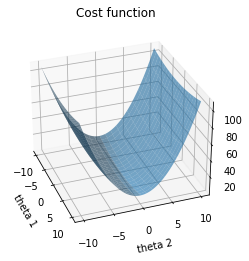

In [367]:
def loss_function(x):
    return x[0]**2*0.08 + x[1]**2

def record_grad_history(theta, optimiser, num_iters=1000):
    theta_0 = []
    theta_1 = []
    loss_history = []

    for i in range(num_iters):
        loss_history.append(loss_function(theta))
        theta_0.append(theta[0])
        theta_1.append(theta[1])
        
        grad = numerical_gradient_1d(loss_function, theta)
#         theta -= lr * grad
        grad_obj = {'x': grad[0], 'y': grad[1] }
        param_obj = {'x': theta[0], 'y': theta[1] }
        optimiser.update(param_obj, grad_obj)
        theta = np.array(list(param_obj.values()))

    return theta, loss_history, theta_0, theta_1


T0, T1 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))

# different loss for different thetas
loss_list = np.array([loss_function([t0, t1]) for t0, t1 in zip(np.ravel(T0), np.ravel(T1))])
# reshape loss_list
loss_list = loss_list.reshape(100, 100)

# plot surface
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(T0, T1, loss_list, rstride=5, cstride=5,alpha=0.6)
# ax.plot(theta_0, theta_1, loss_history, marker='*', c='r', alpha=0.4)
ax.set_xlabel('theta 1') 
ax.set_ylabel('theta 2') 
ax.set_title('Cost function') 
ax.view_init(30, -20)


Text(0.5, 1.0, 'AdaGrad')

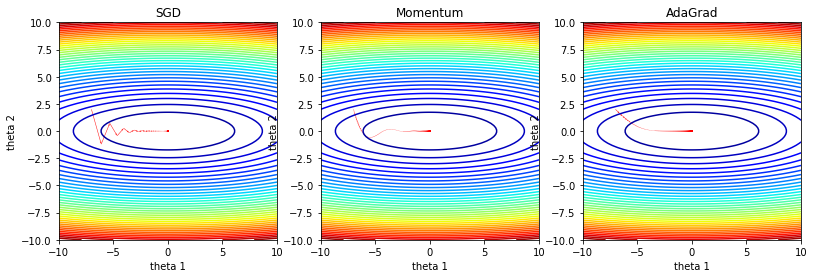

In [368]:
fig = plt.figure(figsize=(18, 4))

# 1. Angles needed for quiver plot 
theta, loss_history, theta_0, theta_1 = record_grad_history(np.array([-7.0, 2.0]), optimiser = SGD(0.8))
anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1] 
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]
# plot contour and path
ax = fig.add_subplot(141)
ax.contour(T0, T1, loss_list, 40, cmap='jet')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, 
          scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)
ax.set_xlabel('theta 1') 
ax.set_ylabel('theta 2') 
ax.set_title('SGD')


# 2. plot contour and path
theta, loss_history, theta_0, theta_1 = record_grad_history(np.array([-7.0, 2.0]), optimiser = Momentum())
anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1] 
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]
# plot contour and path
ax = fig.add_subplot(142)
ax.contour(T0, T1, loss_list, 40, cmap='jet')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, 
          scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)
ax.set_xlabel('theta 1') 
ax.set_ylabel('theta 2')
ax.set_title('Momentum')


# 2. plot contour and path
theta, loss_history, theta_0, theta_1 = record_grad_history(np.array([-7.0, 2.0]), optimiser = AdaGrad(.4))
anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1] 
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]
# plot contour and path
ax = fig.add_subplot(143)
ax.contour(T0, T1, loss_list, 40, cmap='jet')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, 
          scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)
ax.set_xlabel('theta 1') 
ax.set_ylabel('theta 2')
ax.set_title('AdaGrad')


# Convolution Layer

In [ ]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        
        out_h = int(1 + (H + 2 * self.pad - FH) / self.stride )
        out_w = int(1 + (W + 2 * self.pad - FW) / self.stride )
        
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_w = self.W.reshape(FN, -1).T
        out = col @ col_w + self.b
        
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        return out
